In [19]:
from itertools import cycle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import os

pgf_with_pdflatex = {
    "pgf.texsystem": "lualatex",
    "pgf.preamble": [
        r'\usepackage{amsmath}',
        r'\usepackage[scientific-notation=true]{siunitx}',
    ##      r"\usepackage[utf8x]{inputenc}",
    ##      r"\usepackage[T1]{fontenc}",
        ]
}
plt.rcParams.update(pgf_with_pdflatex)

In [33]:
def plot(filename, lim, y_label, loc='upper right', legend_out=False, left=1.2):
    
    out = os.path.basename(filename).split('.')[0]

    data = pd.read_csv(filename)
    
    key = data.keys()[-1]

    sns.set_context('paper')
    sns.set(font='serif')

    sns.set_style("white", {
            "font.family": "serif",
            "font.serif": ["Times"]
        })

    KoTH = data.iloc[3][key]

    
    # https://jwalton.info/Matplotlib-latex-PGF/
    def set_size(width_pt, fraction=1, subplots=(1, 1)):
        """Set figure dimensions to sit nicely in our document.

        Parameters
        ----------
        width_pt: float
                Document width in points
        fraction: float, optional
                Fraction of the width which you wish the figure to occupy
        subplots: array-like, optional
                The number of rows and columns of subplots.
        Returns
        -------
        fig_dim: tuple
                Dimensions of figure in inches
        """
        # Width of figure (in pts)
        fig_width_pt = width_pt * fraction
        # Convert from pt to inches
        inches_per_pt = 1 / 72.27

        # Golden ratio to set aesthetic figure height
        golden_ratio = (5**.5 - 1) / 2

        # Figure width in inches
        fig_width_in = fig_width_pt * inches_per_pt
        # Figure height in inches
        fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

        return (fig_width_in, fig_height_in)



    def get_color():
        return np.array([
            [0.1, 0.1, 0.1], # black
            [0.4, 0.4, 0.4], # very dark gray
            [0.7, 0.7, 0.7], # dark gray
            [0.9, 0.9, 0.9] # light gray
        ])

    color = get_color()

    hatch = ["//", "\\", "x", "*"]

    textwidth = 506
    # latex : \the\columnwidth

    g = sns.FacetGrid(data, col='size', sharex=False, legend_out=legend_out)

    g.map(sns.barplot, 'size', key, 'type', hue_order=["Random", "Semi-random", "KoTH", "Mimosa"], palette=sns.color_palette(color), edgecolor='k', hatch='\\')

    axes = np.array(g.axes.flat)
    
    for ax in g.axes.flat:
        box = ax.get_position()
        ax.set_position([box.x0,box.y0,box.width*0.9,box.height])

    for ax in axes:
        ax.hlines(KoTH, -0.5, 0.5, linestyle='--', linewidth=1)
        ax.set_ylim(0,lim)

    labels = list(map(str,range(1,6)))


    for i, ax in enumerate(axes):
        ax.set_xlabel(labels[i])

        ax.set_ylabel("")
        ax.set_xlabel("")
        ax.set_title("")

    axes.flat[0].set_ylabel(y_label)

    for i in range(1, len(axes)):
        sns.despine(ax=axes[i], left=True)

    for i, ax in enumerate(axes):
        for j, bar in enumerate(ax.patches):
            idx = j%4
            bar.set_hatch(hatch[idx])


    fig = plt.gcf()
    axes.flat[2].set_xlabel("Configuration Set Sizes")

    width, height = set_size(textwidth)
    fig.set_size_inches(width, height)

    plt.tight_layout()

    plt.legend(loc=loc, bbox_to_anchor=(left,1))

    plt.savefig(out+".pdf")
    plt.savefig(out+".pgf")

/home/pwnslinger/.virtualenvs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/pwnslinger/.virtualenvs/py36/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


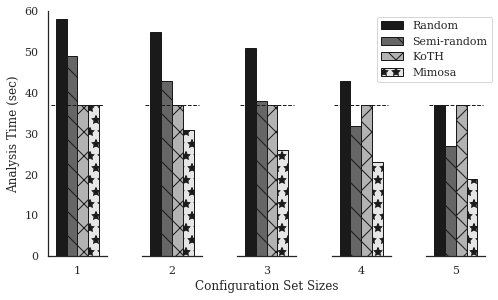

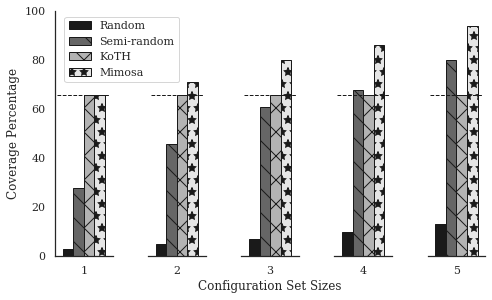

In [34]:
plot('./idle.csv', 60, "Analysis Time (sec)")
plot('./coverage.csv', 100, "Coverage Percentage", legend_out=True, left=-4.2)